## Regression Notebook — Calories Prediction with AutoGluon

###  Introduction


In this notebook, we aim to build a regression model that predicts the number of calories burned in a day using data collected from daily step counts, sleep patterns, distance walked, and other time-related features. We will utilize **AutoGluon**, a powerful AutoML library, to automate model training and evaluation.

This model can help in understanding how different factors like activity and sleep influence calorie burn — potentially useful for health or fitness tracking.


## Data Dictionary

| Column                    | Description                                      | Data Type       |
|---------------------------|--------------------------------------------------|-----------------|
| Full_date                | Date of the record                              | object (string) |
| Day_Name                 | Day of the week                                 | object (string) |
| steps                    | Number of steps taken                           | int64           |
| Activity                 | Activity level (Low, Moderate, High)            | object (string) |
| distance                 | Distance walked (in meters)                     | int64           |
| runDistance              | Distance run (in meters)                        | int64           |
| calories                 | **Target variable** - Calories burned           | int64           |
| Year                     | Year                                             | int64           |
| Month Name               | Month name                                      | object (string) |
| DayType                  | Weekend or Weekday                              | object (string) |
| Full_date (Quarter)      | Quarter of the year                             | object (string) |
| Full_date (Month Index)  | Numeric representation of the month             | int64           |
| Full_date (Month)        | Month name again (redundant)                    | object (string) |
| deepSleepTime            | Duration of deep sleep in minutes               | int64           |
| shallowSleepTime         | Duration of shallow sleep in minutes            | int64           |
| wakeTime                 | Time awake during sleep period (minutes)        | int64           |
| start                    | Sleep start time (Unix timestamp)               | int64           |
| stop                     | Sleep end time (Unix timestamp)                 | int64           |


### 🧪 Code: Load Data & Explore

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from autogluon.tabular import TabularPredictor
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("MySteps.csv")
df.head()

,Full_date,Day_Name,steps,Activity,distance,runDistance,calories,Year,Month Name,DayType,Full_date (Quarter),Full_date (Month Index),Full_date (Month),deepSleepTime,shallowSleepTime,wakeTime,start,stop
0,1-May-16,Sunday,3869,Low,2651,0,244,2016,May,Weekend,Qtr2,5,May,0,0,0,1461708000,1461708000
1,8-May-16,Sunday,4088,Low,3119,0,197,2016,May,Weekend,Qtr2,5,May,158,262,2,1461801240,1461826560
2,9-May-16,Monday,1958,Low,1266,0,134,2016,May,Weekday,Qtr2,5,May,234,241,0,1461883500,1461912000
3,11-May-16,Wednesday,2569,Low,1661,0,198,2016,May,Weekday,Qtr2,5,May,239,318,0,1461979500,1462012920
4,13-May-16,Friday,4276,Low,2809,0,251,2016,May,Weekday,Qtr2,5,May,180,333,3,1462065840,1462096800


### 🧪 Code: Data Overview

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Full_date                2454 non-null   object
 1   Day_Name                 2454 non-null   object
 2   steps                    2454 non-null   int64 
 3   Activity                 2454 non-null   object
 4   distance                 2454 non-null   int64 
 5   runDistance              2454 non-null   int64 
 6   calories                 2454 non-null   int64 
 7   Year                     2454 non-null   int64 
 8   Month Name               2454 non-null   object
 9   DayType                  2454 non-null   object
 10  Full_date (Quarter)      2454 non-null   object
 11  Full_date (Month Index)  2454 non-null   int64 
 12  Full_date (Month)        2454 non-null   object
 13  deepSleepTime            2454 non-null   int64 
 14  shallowSleepTime         2454 non-null  

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
steps,2454.0,8262.905460,6666.920001,0.0,3225.00,6983.0,11046.00,38443.0
distance,2454.0,5955.612469,4872.125039,0.0,2227.00,5010.0,7994.00,29485.0
runDistance,2454.0,826.986553,1826.378002,0.0,153.00,296.0,600.00,21952.0
calories,2454.0,240.008150,213.678332,0.0,90.00,190.0,308.75,2543.0
Year,2454.0,2019.165037,1.950693,2016.0,2017.25,2019.0,2021.00,2023.0
Full_date (Month Index),2454.0,6.685412,3.419754,1.0,4.00,7.0,10.00,12.0
deepSleepTime,2454.0,106.537897,72.531236,0.0,58.00,107.0,157.00,384.0
shallowSleepTime,2454.0,234.849633,132.166576,0.0,187.00,262.0,323.00,601.0
wakeTime,2454.0,4.307661,24.557135,0.0,0.00,0.0,0.00,604.0


### 📊 Code: Target Variable Visualization

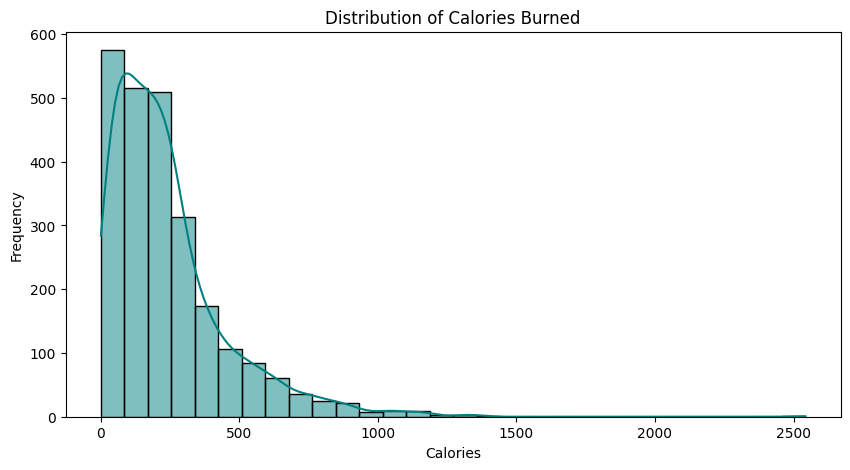

In [9]:
# Visualizing the Target (Calories)
plt.figure(figsize=(10, 5))
sns.histplot(df["calories"], bins=30, kde=True, color="teal")
plt.title("Distribution of Calories Burned")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()


### Activity vs. Calories Burned

C:\Users\mital\AppData\Local\Temp\ipykernel_18276\133581579.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Activity', y='calories', data=df, estimator='mean', ci=None)


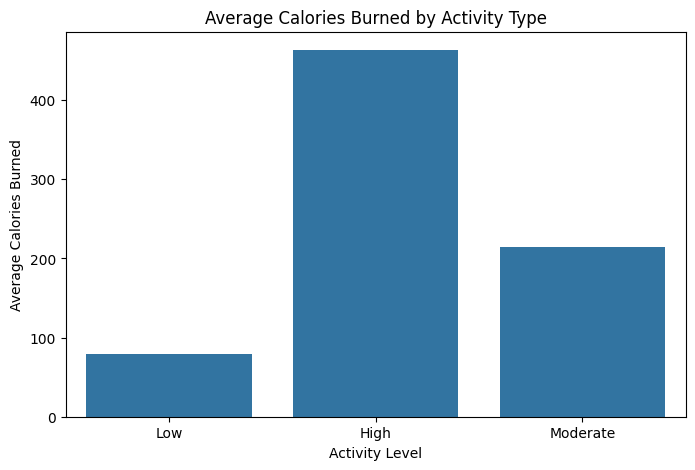

In [19]:

plt.figure(figsize=(8, 5))
sns.barplot(x='Activity', y='calories', data=df, estimator='mean', ci=None)
plt.title("Average Calories Burned by Activity Type")
plt.xlabel("Activity Level")
plt.ylabel("Average Calories Burned")
plt.show()


### Steps vs. Calories Burned

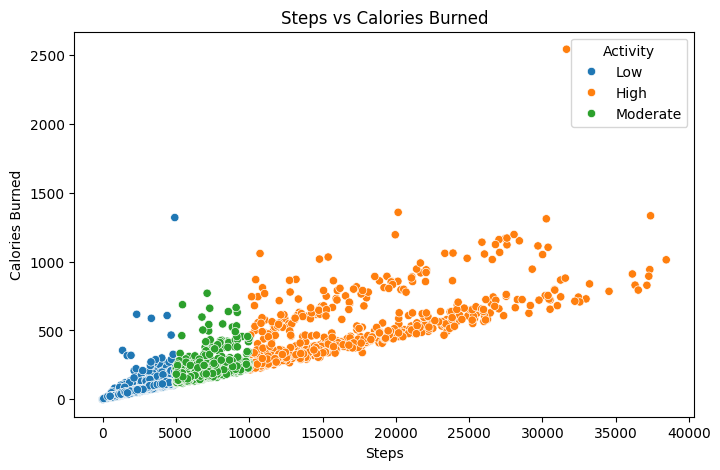

In [20]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='steps', y='calories', hue='Activity', data=df)
plt.title("Steps vs Calories Burned")
plt.xlabel("Steps")
plt.ylabel("Calories Burned")
plt.show()


### 📅 Steps vs. Calories Burned

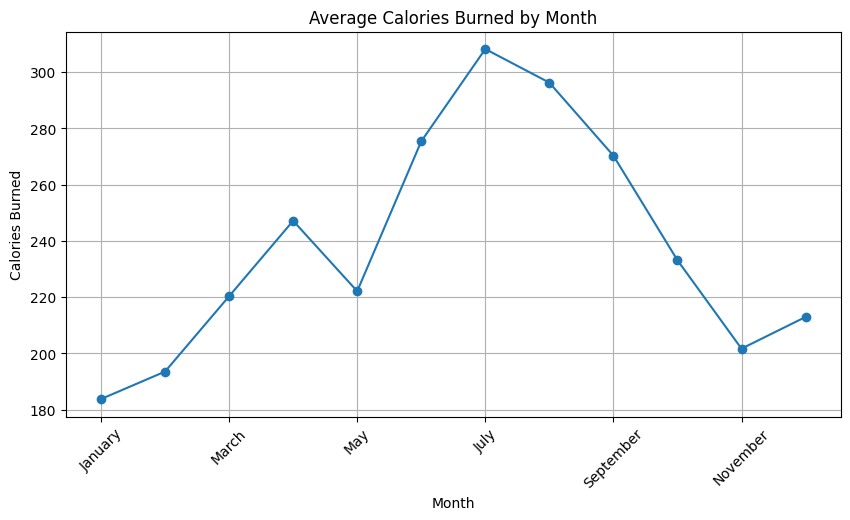

In [21]:
monthly_avg = df.groupby("Month Name")["calories"].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

plt.figure(figsize=(10, 5))
monthly_avg.plot(kind='line', marker='o')
plt.title("Average Calories Burned by Month")
plt.xlabel("Month")
plt.ylabel("Calories Burned")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### 🤖 Code: Train AutoGluon Regressor

In [15]:
predictor = TabularPredictor(label="calories", problem_type="regression").fit(train_data)


No path specified. Models will be saved in: "AutogluonModels\ag-20250415_011219"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          8
Memory Avail:       2.25 GB / 15.74 GB (14.3%)
Disk Space Avail:   196.36 GB / 457.16 GB (43.0%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         

### 🏆 Code: Evaluate Model

In [16]:
predictor.leaderboard(test_data, silent=True)


C:\Users\mital\miniconda3\envs\AutoGluon\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestMSE,-94.700337,-44.343603,root_mean_squared_error,0.285968,0.092225,1.451199,0.285968,0.092225,1.451199,1,True,5
1,LightGBMLarge,-95.074285,-47.670761,root_mean_squared_error,0.041711,0.009855,2.680515,0.041711,0.009855,2.680515,1,True,11
2,WeightedEnsemble_L2,-95.489249,-41.371636,root_mean_squared_error,1.585989,0.140000,41.506976,0.027710,0.000000,0.031707,2,True,12
3,XGBoost,-97.258632,-45.504209,root_mean_squared_error,0.440583,0.012760,1.258177,0.440583,0.012760,1.258177,1,True,9
4,LightGBM,-97.893104,-47.357854,root_mean_squared_error,0.044078,0.010764,1.519688,0.044078,0.010764,1.519688,1,True,4
5,ExtraTreesMSE,-98.810025,-50.041938,root_mean_squared_error,0.283435,0.137652,1.373839,0.283435,0.137652,1.373839,1,True,7
6,LightGBMXT,-99.453671,-52.269196,root_mean_squared_error,0.037505,0.012349,1.580990,0.037505,0.012349,1.580990,1,True,3
7,CatBoost,-100.558884,-48.470026,root_mean_squared_error,0.047122,0.007919,33.627568,0.047122,0.007919,33.627568,1,True,6
8,NeuralNetFastAI,-100.812706,-51.936070,root_mean_squared_error,0.740528,0.016332,3.618636,0.740528,0.016332,3.618636,1,True,8
9,NeuralNetTorch,-104.558695,-54.710107,root_mean_squared_error,0.066352,0.058704,28.212030,0.066352,0.058704,28.212030,1,True,10


In [23]:
performance = predictor.evaluate(test_data)
performance


C:\Users\mital\miniconda3\envs\AutoGluon\Lib\site-packages\fastai\learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


{'root_mean_squared_error': -95.48924939919249,
 'mean_squared_error': -9118.196750821184,
 'mean_absolute_error': -28.191356792954952,
 'r2': 0.8253178596496582,
 'pearsonr': 0.9114222738692372,
 'median_absolute_error': -10.677536010742188}

### Conclusion



With just a few lines of code using AutoGluon, we were able to train a regression model that predicts calorie expenditure based on daily activity and sleep patterns. The AutoGluon framework automatically handled feature engineering, model selection, and tuning — delivering competitive results with minimal effort.

Such models can assist in developing smart fitness tracking systems or provide personal insights into daily health data.


###                                               Thank You